In [1]:
import sstar

In [2]:
import preprocess
import train
import stats
import infer

In [3]:
import os

In [4]:
#parameters for training

demo_model_file="./examples/models/archie2.yaml"
nrep = 1000
nref = 10
ntgt= 1
ref_id = 'N1'
tgt_id = 'N2'
src_id = 'Na'
seq_len = 50000
mut_rate = 1.25e-8
rec_rate = 1e-8
thread = 6
output_prefix = "example1"
output_dir = "example2"
seed = None
preprocess.store_global_parameters(demo_model_file, nrep, nref, ntgt, ref_id, tgt_id, src_id, seq_len, mut_rate, rec_rate, thread, output_prefix, output_dir)

In [5]:
#create training folders
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#and for the test set
if not os.path.exists(output_dir + "test"):
    os.makedirs(output_dir + "test")    

In [6]:
train._simulation_manager_folders(demo_model_file, nrep, nref, ntgt, ref_id, tgt_id, src_id, seq_len, mut_rate, rec_rate, thread, output_prefix, output_dir, seed)

In [7]:
#train logistisc classifier with simulated data
#train.train_parameters_archienew_fin(demo_model_file, nrep, nref, ntgt, ref_id, tgt_id, src_id, seq_len, mut_rate, rec_rate, thread, output_prefix, output_dir)

In [8]:
#create training data and return dataframe
newdf = train._train_archie_folders(demo_model_file, nrep, nref, ntgt, ref_id, tgt_id, src_id, seq_len, mut_rate, rec_rate, thread, output_prefix, output_dir, drop_dynamic_cols=False)

In [9]:
newdf

,0-ton,1-ton,2-ton,pairwised_dist1,pairwised_dist2,mean_pairwised_dist,var_pairwised_dist,skew_pairwised_dist,kurtosis_pairwised_dist,min_dist_to_ref,S*_score,private_SNP_num,label
0,0,13,13,0.0,4.690416,2.345208,5.50,0.0,-2.0,3.000000,0.0,0,0
1,0,9,13,0.0,4.690416,2.345208,5.50,0.0,-2.0,1.414214,0.0,0,0
0,0,8,7,0.0,4.582576,2.291288,5.25,0.0,-2.0,3.605551,0.0,5,0
1,0,13,7,0.0,4.582576,2.291288,5.25,0.0,-2.0,4.242641,0.0,3,0
0,0,18,7,0.0,5.000000,2.500000,6.25,0.0,-2.0,3.741657,0.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0,8,12,0.0,3.605551,1.802776,3.25,0.0,-2.0,2.000000,0.0,3,0
0,0,7,8,0.0,3.464102,1.732051,3.00,0.0,-2.0,2.828427,0.0,4,0
1,0,5,8,0.0,3.464102,1.732051,3.00,0.0,-2.0,2.449490,0.0,4,0
0,0,37,16,0.0,8.485281,4.242641,18.00,0.0,-2.0,6.244998,4296.0,13,0


In [10]:
output_dir_test = "test_example1"
output_prefix_test = "pre_test_example1"

In [11]:
#test_parameters
demo_model_file="./examples/models/archie2.yaml"
nrep = 100
nref = 50
ntgt= 1
ref_id = 'N1'
tgt_id = 'N2'
src_id = 'Na'
seq_len = 500000
mut_rate = 1.25e-8
rec_rate = 1e-8
thread = 6
seed = None
preprocess.store_global_parameters(demo_model_file, nrep, nref, ntgt, ref_id, tgt_id, src_id, seq_len, mut_rate, rec_rate, thread, output_prefix_test, output_dir_test)

In [12]:
import pandas as pd
#load picklefile, alternatively use trained model from above
scikitfile = pd.read_pickle("archie_rtr_model_nref50_onemio.scikit.pickle")
statsmodelsfile = pd.read_pickle("archie_rtr_model_nref50_onemio.statsmodels.pickle")

In [13]:
scikitfile

LogisticRegression(max_iter=1000, penalty=None, solver='newton-cg')

In [14]:
#create folders with testdata
infer.create_testdata_folders(demo_model_file, nrep, nref, ntgt, ref_id, tgt_id, src_id, seq_len, mut_rate, rec_rate, thread, output_prefix_test, output_dir_test)

In [15]:
#get all directories in test path
def listdir_fullpath(d):
    return [os.path.join(d, f) for f in os.listdir(d)]
output_dirs_test = listdir_fullpath(output_dir_test)

Features taken from scikit model


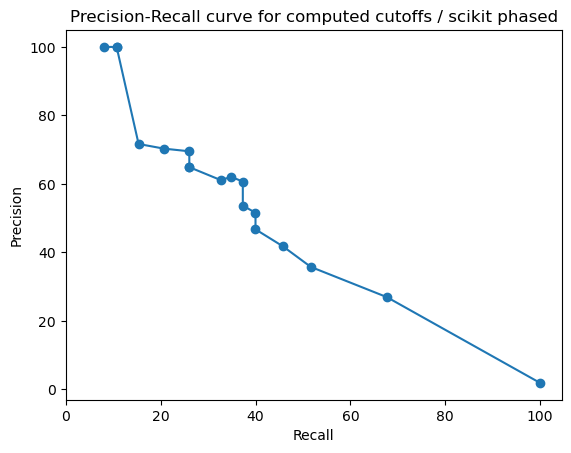

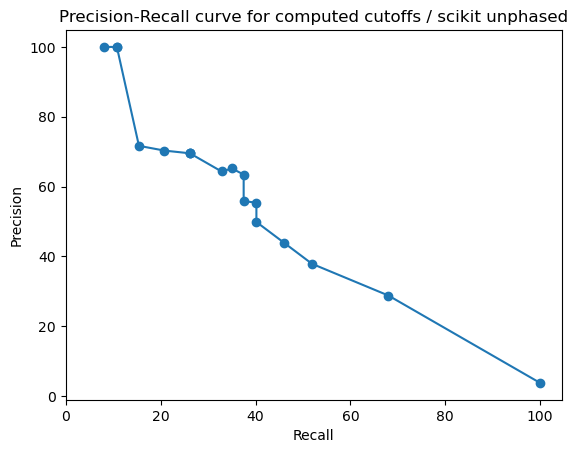

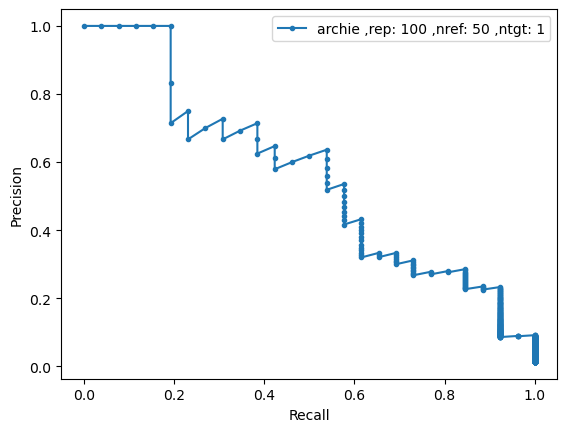

,chrom,start,end,sample,0-ton,1-ton,2-ton,pairwised_dist1,pairwised_dist2,mean_pairwised_dist,...,min_dist_to_ref,S*_score,private_SNP_num,haplo,rep,overlap,overlap_percentage,label_one_1,label_one_2,label_one_3
0,1,0,50000,tsk_50,0,10,20,0.0,4.242641,2.12132,...,3.316625,0,2,0,0,0,0,0,0,1
1,1,0,50000,tsk_50,0,8,20,0.0,4.242641,2.12132,...,3.741657,0,3,1,0,0,0,0,0,1
2,1,50000,100000,tsk_50,0,13,8,0.0,5.830952,2.915476,...,2.44949,0,3,0,0,0,0,0,0,1
3,1,50000,100000,tsk_50,0,21,8,0.0,5.830952,2.915476,...,2.645751,0,4,1,0,0,0,0,0,1
4,1,100000,150000,tsk_50,0,13,13,0.0,5.385165,2.692582,...,2.236068,0,2,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,1,350000,400000,tsk_50,0,2,14,0.0,1.732051,0.866025,...,2.0,0.0,2,1,99,0,0,0,0,1
16,1,400000,450000,tsk_50,0,12,10,0.0,4.898979,2.44949,...,2.645751,0.0,0,0,99,0,0,0,0,1
17,1,400000,450000,tsk_50,0,12,10,0.0,4.898979,2.44949,...,3.741657,0.0,2,1,99,0,0,0,0,1
18,1,450000,500000,tsk_50,0,20,9,0.0,6.63325,3.316625,...,3.741657,0.0,2,0,99,0,0,0,0,1


In [16]:
infer.predict_introgression_folders(nrep,nref,ntgt, seq_len, thread, output_prefix_test, output_dirs_test, statsmodel=statsmodelsfile, scikitmodel="archie_rtr_model_nref50_onemio.scikit.pickle", evaluate=True, simulated=True,  compute_cutoffs=True, plot_curves=True)